# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [54]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
from palmerpenguins import load_penguins

df_penguins = load_penguins()
df_penguins = df_penguins.dropna()

X = df_penguins.drop("species", axis=1)
y = df_penguins["species"]

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

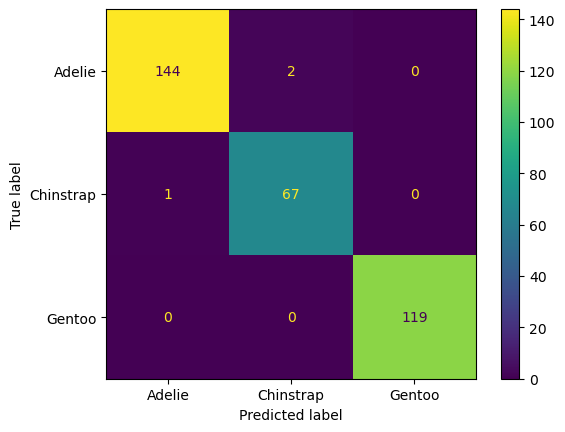

In [27]:
# kNN 5

ct = ColumnTransformer(
    [
      ("dummify", 
      OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
      make_column_selector(dtype_include=object)),
      ("standardize", 
      StandardScaler(), 
      make_column_selector(dtype_include=np.number))
    ],
    remainder = "drop"
    )

pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_5", KNeighborsClassifier(n_neighbors=5))]
).set_output(transform="pandas")

y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)).plot()

In [19]:
accuracy_score(y, y_pred)

0.990990990990991

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.97      0.99      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.97      0.99      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



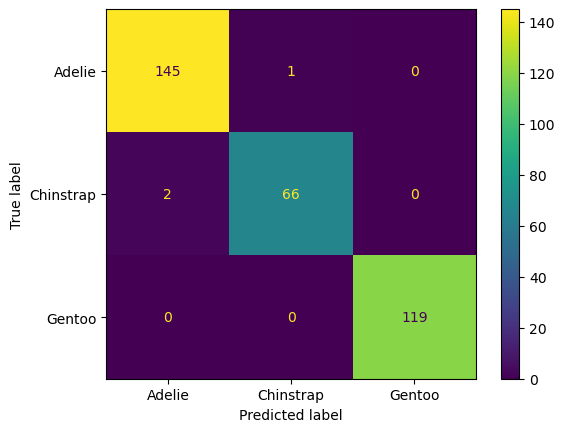

In [29]:
# kNN 10

ct = ColumnTransformer(
    [
      ("dummify", 
      OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
      make_column_selector(dtype_include=object)),
      ("standardize", 
      StandardScaler(), 
      make_column_selector(dtype_include=np.number))
    ],
    remainder = "drop"
    )

pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_10", KNeighborsClassifier(n_neighbors=10))]
).set_output(transform="pandas")

y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)).plot()

In [30]:
accuracy_score(y, y_pred)

0.990990990990991

In [31]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



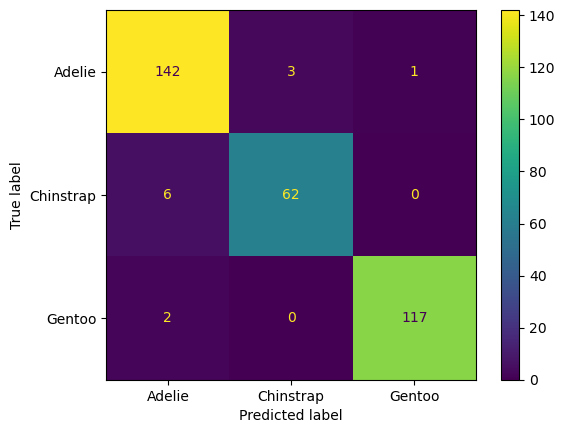

In [36]:
# Decision Tree 0.01

ct = ColumnTransformer(
    [
      ("dummify", 
      OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
      make_column_selector(dtype_include=object)),
      ("standardize", 
      StandardScaler(), 
      make_column_selector(dtype_include=np.number))
    ],
    remainder = "drop"
    )

pipeline = Pipeline(
  [("preprocessing", ct),
  ("dec_tree", DecisionTreeClassifier(min_impurity_decrease=0.01))]
).set_output(transform="pandas")

y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)).plot()

In [37]:
accuracy_score(y, y_pred)

0.963963963963964

In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       146
   Chinstrap       0.95      0.91      0.93        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       146
   Chinstrap       0.95      0.91      0.93        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333



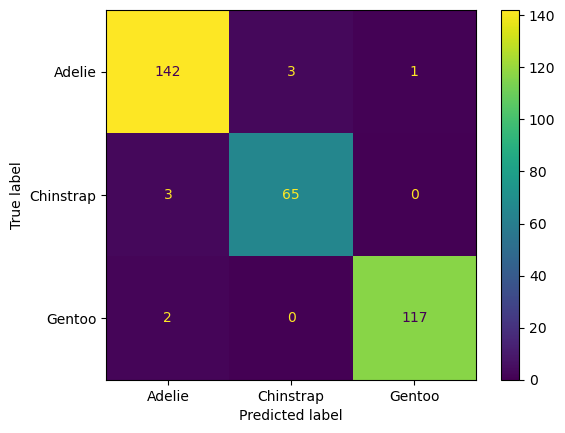

In [39]:
# Decision Tree 0.001

ct = ColumnTransformer(
    [
      ("dummify", 
      OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
      make_column_selector(dtype_include=object)),
      ("standardize", 
      StandardScaler(), 
      make_column_selector(dtype_include=np.number))
    ],
    remainder = "drop"
    )

pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_10", DecisionTreeClassifier(min_impurity_decrease=0.001))]
).set_output(transform="pandas")

y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)).plot()

In [40]:
accuracy_score(y, y_pred)

0.972972972972973

In [41]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.96      0.96      0.96        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.96      0.96      0.96        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



In [69]:
y_chinstrap = (y == "Chinstrap")

y_prob = cross_val_predict(pipeline, X, y_chinstrap, cv=5, method="predict_proba")[:, 1]

fpr, tpr, thresholds = roc_curve(y_chinstrap, y_prob)
roc_auc = roc_auc_score(y_chinstrap, y_prob)

roc_data = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

In [71]:
roc_data

,FPR,TPR
0,0.000000,0.000000
1,0.011321,0.970588
2,1.000000,1.000000


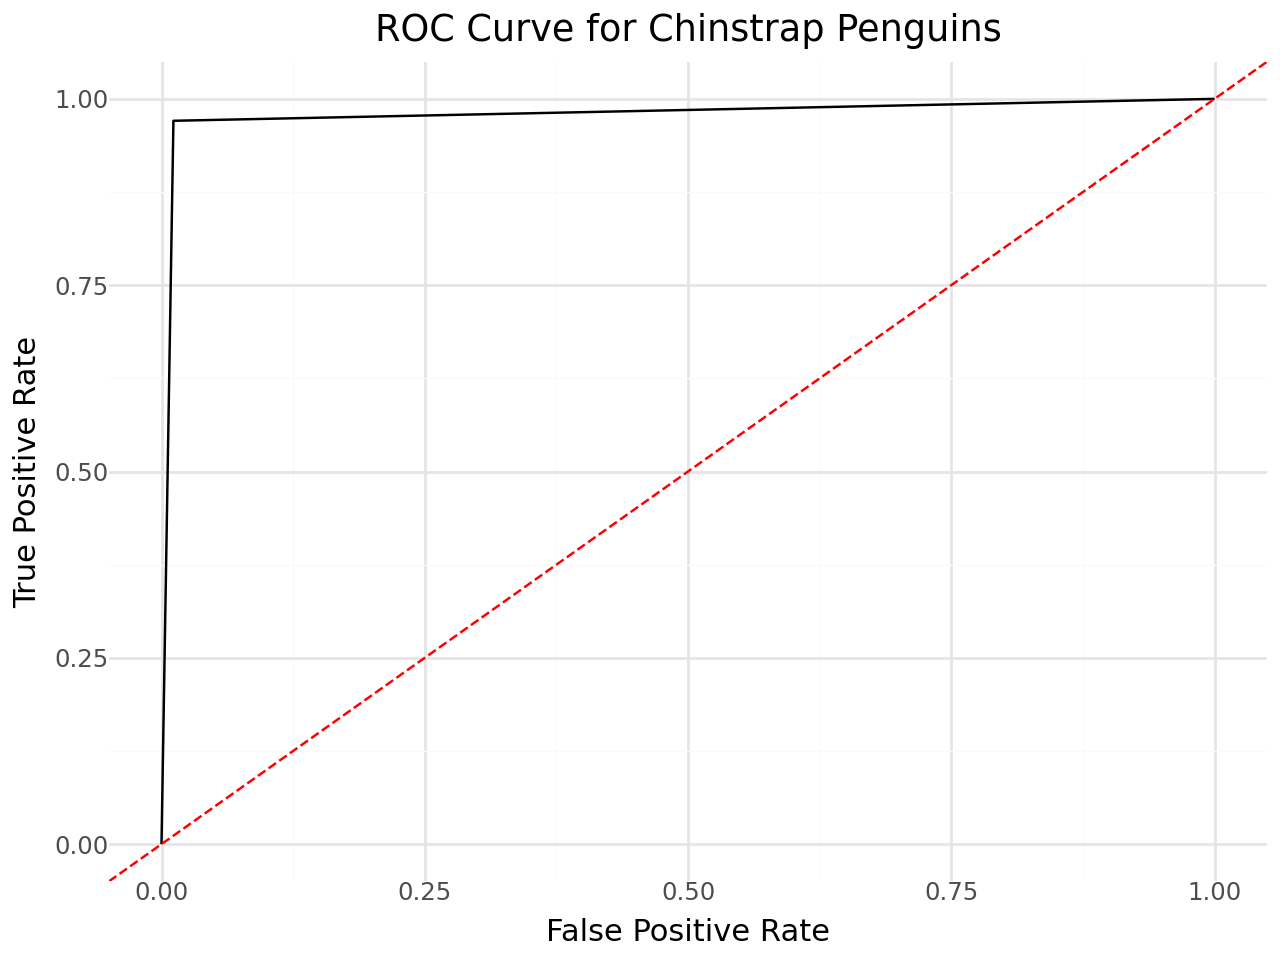

In [72]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, geom_abline

(ggplot(roc_data, aes(x="FPR", y="TPR")) +
geom_line() +
geom_abline(slope=1, intercept=0, linetype='--', color="red") +
labs(title="ROC Curve for Chinstrap Penguins",
         x="False Positive Rate",
         y="True Positive Rate") +
theme_minimal())